# IS 362 Week 8 {Assignment}
Sanam Maharjan & Praveen Lama

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = "\s+", 
                   names =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name'], 
                   header= None)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [62]:
# checking data type of columns
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

> Since 'Horsepower' is object, we need to convert object datatype to float64

In [63]:
convert = df
convert['horsepower'] = pd.to_numeric(convert['horsepower'], errors ='coerce') # converting object type to float
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [64]:
convert.tail(5) # displaying last 5 data 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,chevy s-10


In [65]:
# Since datatype is changed, now we need to check null values
convert.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [66]:
# finding null data in horsepower column
convert[(convert['horsepower'].isnull())]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


> It will be easy if we just replace **'NUll'** value with **'0'**. I am thinking to assing an average value which is based on data of others cars horsepower. Data will be based on same model year and its cylinders type. 

In [67]:
# generating average horsepower value based on same year and cylinder
# row 32
Na1S = (convert['model year'] == 71 ) & (convert['cylinders'] == 4)
Na1A = round(convert[Na1S]['horsepower'].mean(),2)

# row 126
Na2S = (convert['model year'] == 74 ) & (convert['cylinders'] == 6)
Na2A = round(convert[Na2S]['horsepower'].mean(),2)
# row 330 & 336
Na3S = (convert['model year'] == 80 ) & (convert['cylinders'] == 4)
Na3A = round(convert[Na3S]['horsepower'].mean(),2)
# row 354
Na4S = (convert['model year'] == 81 ) & (convert['cylinders'] == 4)
Na4A = round(convert[Na4S]['horsepower'].mean(),2)
# row 374
Na5S = (convert['model year'] == 82 ) & (convert['cylinders'] == 4)
Na5A = round(convert[Na5S]['horsepower'].mean(),2)

#replacing values based on row no
convert.iloc[32] = convert.iloc[32].fillna(Na1A)
convert.iloc[126] = convert.iloc[126].fillna(Na2A)
convert.iloc[330] = convert.iloc[330].fillna(Na3A)
convert.iloc[336] = convert.iloc[336].fillna(Na3A)
convert.iloc[354] = convert.iloc[354].fillna(Na4A)
convert.iloc[374] = convert.iloc[374].fillna(Na5A)

In [68]:
convert.isnull().sum() # Checking if there are still null values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [69]:
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [70]:
convert['origin'] = convert['origin'].astype(str)
convert.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [71]:
convert.loc[convert['origin']=='1', 'origin'] = 'USA'
convert.loc[convert['origin']=='2', 'origin'] = 'Asia'
convert.loc[convert['origin']=='3', 'origin'] = 'Europe'
convert.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst


In [72]:
# exporting tidy data to diffrent csv file
convert.to_csv('auto-mpg.csv', index = False)
data = pd.read_csv('auto-mpg.csv')
data.isnull().sum()
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


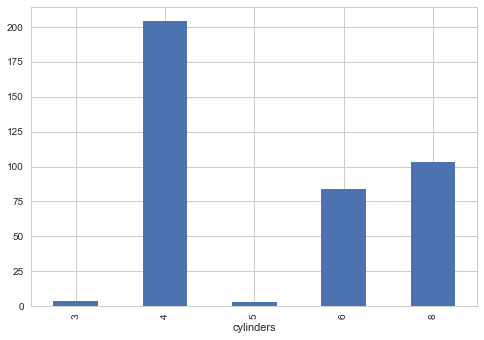

In [73]:
sns.set_style('whitegrid')
CYL = data.groupby('cylinders')
CYL['car name'].count().plot.bar()
#data['cylinders'].plot.bar().groupby(data['cylinders'])

In [74]:
data.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst


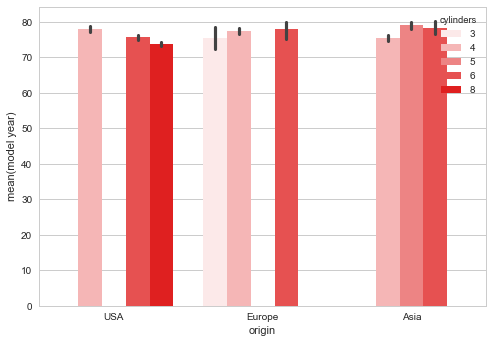

In [75]:
sns.set_style('whitegrid')
sns.barplot(x = 'origin', y = 'model year', hue = 'cylinders', color= 'red', data = data)

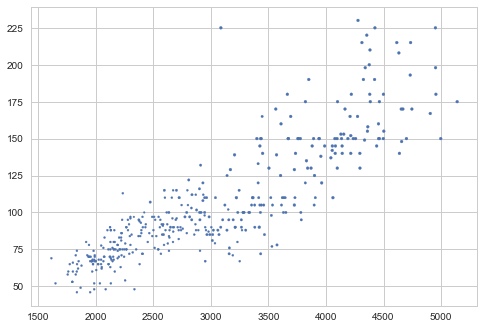

In [76]:
plt.scatter(data.weight, data.horsepower, s=data.cylinders)

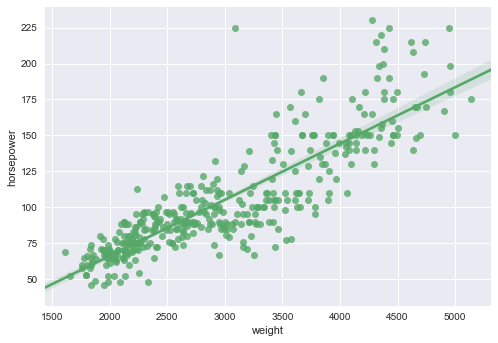

In [77]:
sns.set(color_codes=True)
sns.regplot(x=data.weight, y=data.horsepower, data=data, color='g')